In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%load_ext autoreload
%autoreload 2

# Seller P&L Analyis + GeoPandas 🌎

🎯 The goal of this exercise is to compute the P&L associated to each seller  

For each `seller_id` we need three items:  

- The **revenue**:
 - 10% fee on sales
 - 80 BRL per month on Olist


- The **cost**:
 - Review cost according to `{1: 100, 2: 50, 3: 40, 4: 0, 5: 0}` with review score as key and cost in BRL as value


- The **profit** made by Olist

💡 Let's not start from scratch  
❓ Import your seller training set and investigate what you already have.


In [ ]:
# YOUR CODE HERE

❓ What is missing?  
Write down a strategy to get your missing columns  
Re-use as much of what has already been coded in `seller.py` as possible

In [ ]:
# Your pseudo-code

❓ Make a copy of `seller.py`, rename it `seller_updated.py` and update it accordingly

> YOUR ANSWER HERE

❓ Compute seller profits

> YOUR ANSWER HERE

❓ Load your updated DataFrame

In [ ]:
# YOUR CODE HERE

❓ Sort sellers by profit, and analyse their profitability: conclude on a possible strategy for Olist!

In [ ]:
# YOUR CODE HERE

# Optional Bonus: GeoPandas

For any students looking for some alternative/more advanced ways to carry out and present their analysis, we can check out some GeoPandas code!

In [ ]:
!pip install geopandas

### What is [GeoPandas](https://geopandas.org/en/stable/index.html)?

GeoPandas is a Python module that adds geospatial capabilities to the popular Pandas library. 🌍 It's like a magic wand for working with geographical data, allowing you to manipulate, analyze, and visualize geospatial datasets with ease. 📊 

With GeoPandas, you can load and save various geospatial file formats:
- (Shapefile (.shp)
- GeoJSON (.geojson)
- GeoPackage (.gpkg)
- KML (.kml)
- GeoTIFF (.tif)

Once loaded, you can perform spatial operations like intersections and buffers, and create beautiful maps to showcase your findings. 🎨 It builds upon powerful geospatial libraries like Shapely and Fiona, providing a comprehensive toolset for all your geospatial needs 💪 

### Part 1: Basic usage

Similar to libraries like Seaborn, GeoPandas has its own demo datasets we can have a quick play with!

In [3]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Load the Natural Earth cities dataset
world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Print the loaded data
world_df.head()


/var/folders/f3/_grdrh9n7_7gwgk0bqz6rhpc0000gn/T/ipykernel_95285/1536026705.py:5: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_df = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


If we want to plot our geometry out, all we have to do is call .plot()

<AxesSubplot:>

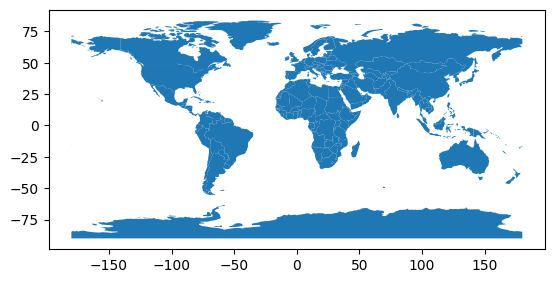

In [4]:
world_df.plot()

Let's use our population column to add some color by specifying `column =` in our `.plot()`

<AxesSubplot:>

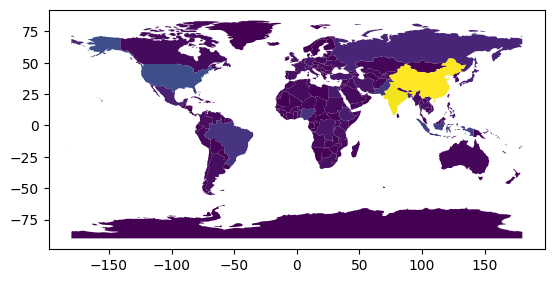

In [5]:
world_df.plot(column  = "pop_est")

We can overlay two plots on top of each other very easily, too:

/var/folders/f3/_grdrh9n7_7gwgk0bqz6rhpc0000gn/T/ipykernel_95285/3050745065.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_cities' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  cities_df = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))


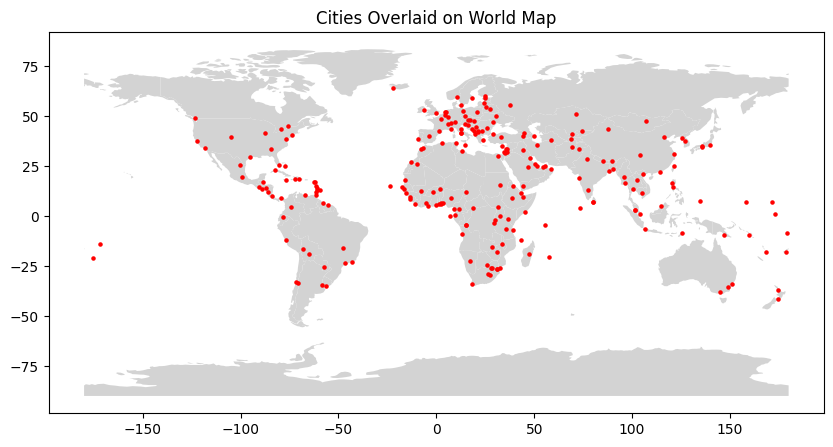

In [6]:
# Load the Natural Earth cities dataset
cities_df = gpd.read_file(gpd.datasets.get_path('naturalearth_cities'))

fig, ax = plt.subplots(figsize=(10, 6))

# Plot the world map + cities
world_df.plot(ax=ax, color='lightgray')
cities_df.plot(ax=ax, marker='o', color='red', markersize=5)

# Set our title
plt.title('Cities Overlaid on World Map')
plt.show()


If this is all you have time for, hop to the end to see an Olist example!

### Part Two: London Tube Investigation! 

First, download [this folder](https://wagon-public-datasets.s3.amazonaws.com/data-science-images/geopandas_decision_science/data.zip) and put it into a `data` folder in this directory. Let's load up a the `London_Ward.shp` shapefile (if you look in the folder you'll see it's split into a few parts - see [this](https://en.wikipedia.org/wiki/Shapefile) for why!) for London's regions and also our locations for tube stops (`london-underground.geojson`).

In [8]:
london_stations = gpd.read_file("data/london-underground.geojson")

In [9]:
london_map = gpd.read_file("data/London_Ward.shp")
london_map.head()

,NAME,GSS_CODE,DISTRICT,LAGSSCODE,HECTARES,NONLD_AREA,geometry
0,Chessington South,E05000405,Kingston upon Thames,E09000021,755.173,0.0,"POLYGON ((516401.596 160201.802, 516407.302 16..."
1,Tolworth and Hook Rise,E05000414,Kingston upon Thames,E09000021,259.464,0.0,"POLYGON ((519552.998 164295.600, 519508.096 16..."
2,Berrylands,E05000401,Kingston upon Thames,E09000021,145.390,0.0,"POLYGON ((518107.499 167303.399, 518114.301 16..."
3,Alexandra,E05000400,Kingston upon Thames,E09000021,268.506,0.0,"POLYGON ((520336.700 165105.498, 520332.198 16..."
4,Beverley,E05000402,Kingston upon Thames,E09000021,187.821,0.0,"POLYGON ((521201.203 169275.505, 521204.303 16..."


<AxesSubplot:>

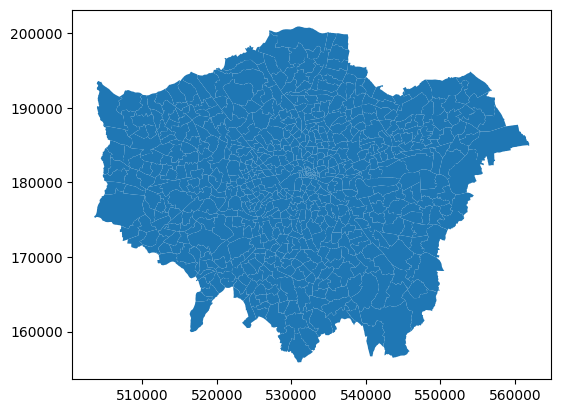

In [10]:
london_map.plot()

Looks like we have a few too many wards. What we're more interested in is the Districts. Let's use `.dissolve(by = "DISTRICT")` to merge our District shapes together. You can think of it like a geospatial groupby!

In [11]:
london_districts = london_map.dissolve(by = "DISTRICT", as_index = False)

<AxesSubplot:>

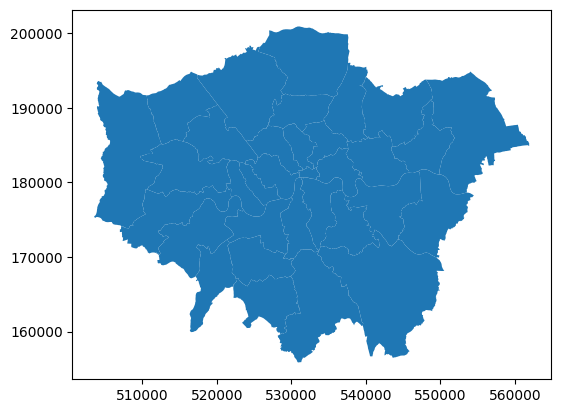

In [12]:
london_districts.plot()

That looks more reasonable! Let's overlay our tube stations

<AxesSubplot:>

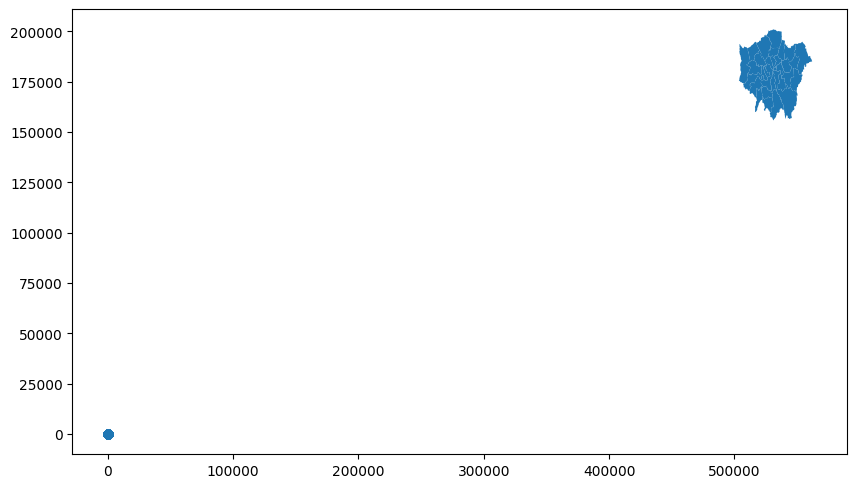

In [13]:
fig, ax = plt.subplots(figsize = (10,10))
london_districts.plot(ax = ax)
london_stations.plot(ax = ax)

That doesn't look right 😬  This often occurs when our geometries have been saved on different projections. Let's use `.crs` to check!

🌍 Coordinate Reference Systems (CRS) in GeoPandas are like the Earth's GPS coordinates system. They provide a way to precisely locate and interpret spatial data. 🗺️ A CRS consists of a coordinate system and a datum, ensuring that geographic features are accurately represented on maps. It also allows for transformations between different CRSs, so you can project or reproject data to fit specific needs. 🔀 With CRS, GeoPandas helps you navigate the spatial world, ensuring your data aligns correctly and enabling you to explore and analyze geographic information effectively.

In [14]:
print(london_districts.crs)
print(london_stations.crs)

EPSG:27700
EPSG:4326


Let's change the projection of our stations to match our districts and try again:

In [15]:
london_stations = london_stations.to_crs("EPSG:27700")

In [16]:
print(london_districts.crs)
print(london_stations.crs)

EPSG:27700
EPSG:27700


Looks like they're aligned; let's visualize to check!

<AxesSubplot:>

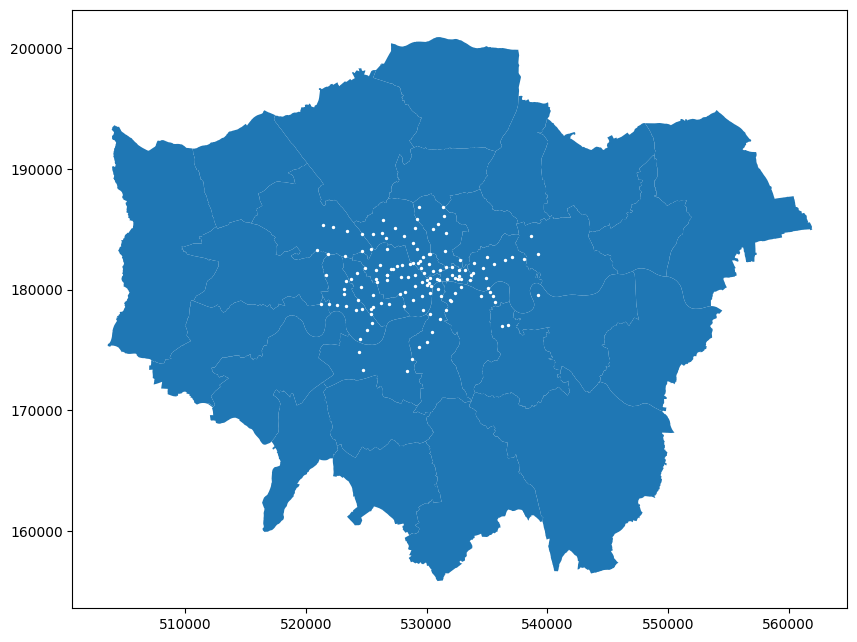

In [17]:
fig, ax = plt.subplots(figsize = (10,10))
london_districts.plot(ax = ax)
london_stations.plot(ax = ax, markersize = 2, color = "white")

Much better! Now let's use [`.buffer()`](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoSeries.buffer.html) to see how much area is within an 800m walk of a tube station!

In [18]:
station_buffer = london_stations.buffer(800)

What does our buffered out area look like? What's its total area?

<AxesSubplot:>

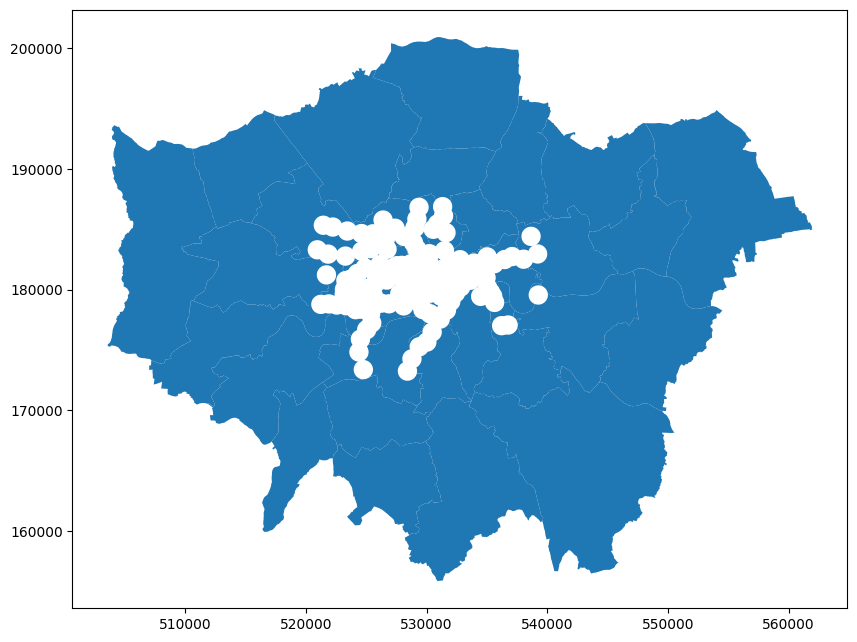

In [19]:
fig, ax = plt.subplots(figsize = (10,10))
london_districts.plot(ax = ax)
station_buffer.plot(ax = ax, color = "white")

To find its area we can simply use `.unary_union` (which blends all of our shapes together) and then `.area`

In [20]:
print(f"Total area within 800m of a station is: {station_buffer.unary_union.area} square meters \
or {station_buffer.unary_union.area / 1_000_000} square km")

Total area within 800m of a station is: 136661306.42340228 square meters or 136.66130642340227 square km


### Finally, we can look at which areas are best and worst served!

First we need to dissolve our buffer geometries all into one large shape. But we can only call use the `.dissolve()` method on a GeoDataFrame and our `station_buffer` is a `GeoSeries`:

In [21]:
type(station_buffer)

geopandas.geoseries.GeoSeries

So first we convert to a `GeoDataFrame` (by simply writing `GeoDataFrame(<our_series>)`) and then we can call `.dissolve()`

N.B. When converting to a GeoDataFrame, we also have to specify that our geometry is in our first - and only column - by writing `geometry = 0`

In [22]:
buffer_df = gpd.GeoDataFrame(station_buffer, geometry=0).dissolve()

In [23]:
buffer_df

,0
0,"MULTIPOLYGON (((525372.736 172867.202, 525320...."


Our final step is to use the `.overlay()` function with the `"intersection"` argument. This will return to us the intersection between our two GeoDataFrames on a district by district basis! Then create our final column in our DataFrame as the area of the geometry.

<img src = "https://wagon-public-datasets.s3.amazonaws.com/data-science-images/gpd_overlays.webp">

In [28]:
gdf_overlap = gpd.overlay(buffer_df,london_districts, how='intersection')

Now, we can plot out one district!

/var/folders/f3/_grdrh9n7_7gwgk0bqz6rhpc0000gn/T/ipykernel_95285/1477895808.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


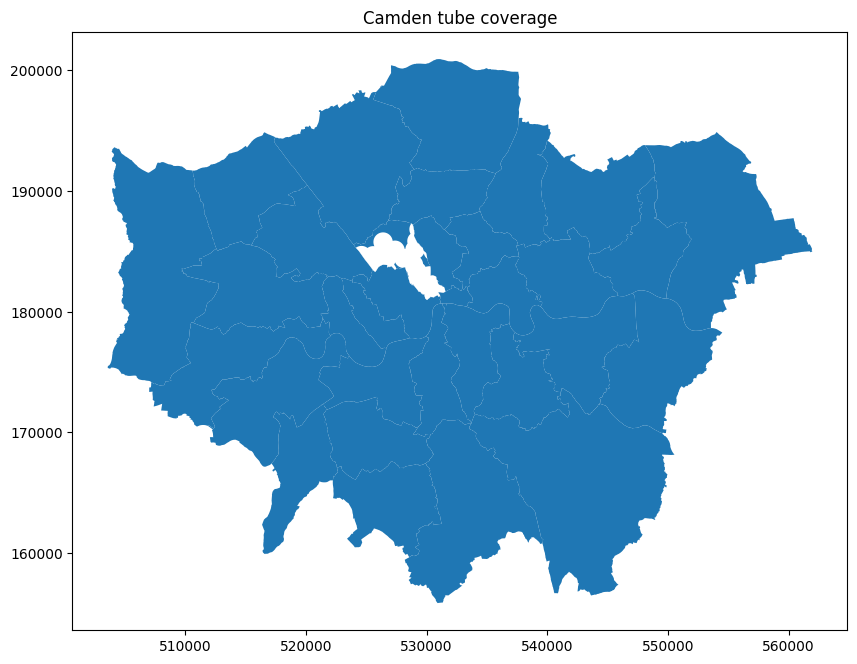

In [25]:
fig, ax = plt.subplots(figsize = (10,10))
london_districts.plot(ax = ax)
# Here we're just selecting the geometry with our second district (Camden)
gdf_overlap.loc[[1],'geometry'].plot(ax = ax,color = "white")
plt.title('Camden tube coverage')
fig.show()

All that's left is to create a new column which describes the area of each of our polygons so we can say how much of each DISTRICT was covered by our tubes! Creating new columns works just like it does in Pandas and all we need to do is access the `.area` attribute of our column.

In [29]:
gdf_overlap["area_covered"] = gdf_overlap["geometry"].area

Then we merge it all into one GeoDataFrame

In [30]:
merged = london_districts.merge(gdf_overlap[["DISTRICT", "area_covered"]], on = "DISTRICT")

In [31]:
merged.head()

,DISTRICT,geometry,NAME,GSS_CODE,LAGSSCODE,HECTARES,NONLD_AREA,area_covered
0,Brent,"POLYGON ((521058.398 183113.004, 521051.002 18...",Northwick Park,E05000096,E09000005,267.991,0.000,1.017136e+07
1,Camden,"POLYGON ((527578.700 183595.996, 527478.003 18...",Swiss Cottage,E05000144,E09000007,125.671,0.000,1.668167e+07
2,City and County of the City of London,"POLYGON ((532715.002 180519.596, 532684.396 18...",Castle Baynard,E05009297,E09000001,35.639,6.686,3.149383e+06
3,City of Westminster,"POLYGON ((525804.503 180580.599, 525724.402 18...",St. James's,E05000644,E09000033,346.379,27.146,2.079744e+07
4,Ealing,"POLYGON ((510854.302 179385.201, 510880.002 17...",Norwood Green,E05000186,E09000009,379.609,0.000,2.126696e+06


Calculate the overall area of each district:

In [32]:
merged["total_area"] = merged.geometry.area

And divide!

In [33]:
merged["percentage_covered"] = (merged["area_covered"] / merged["total_area"]) * 100

In [34]:
merged[["DISTRICT", "percentage_covered"]].sort_values(by = "percentage_covered")

,DISTRICT,percentage_covered
14,Merton,0.053285
16,Richmond upon Thames,0.324262
9,Hounslow,2.234665
8,Haringey,2.410578
5,Greenwich,3.564170
4,Ealing,3.828826
6,Hackney,7.639807
13,Lewisham,9.258280
15,Newham,11.886777
19,Wandsworth,20.286258


## How can we apply this to Olist? 

Well, for starters we can make some great plots. Run the cells below to generate a map of Brazil with NPS overlaid. Where you go from here is your choice tomorrow 💪

In [35]:
import geopandas as gpd
from olist.data import Olist
from olist.order import Order
import matplotlib.pyplot as plt
data = Olist().get_data()
orders = Order().get_training_data()

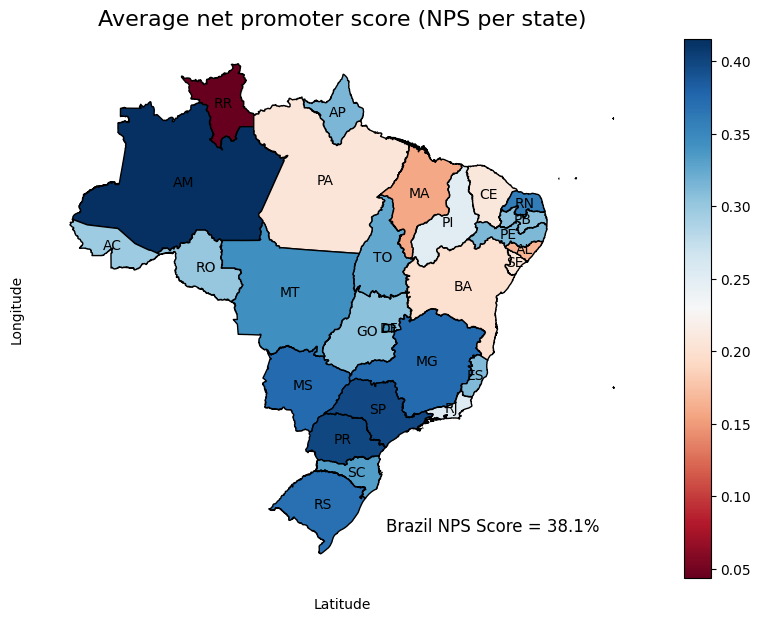

In [37]:
# Calculate NPS score per state
merge = data['orders'].merge(data['order_reviews'], on='order_id')\
                      .merge(data['customers'], on='customer_id')

by_state_nps = merge.groupby(['customer_state'], as_index=False)['review_score'] \
                    .apply(lambda s: s.map({5:1, 4:0, 3:-1, 2:-1, 1:-1}).sum() / s.count()) \
                    .rename(columns={"review_score":"average_nps"})

nps_brazil = orders.review_score.map({5:1, 4:0, 3:-1, 2:-1, 1:-1}).sum() / orders.review_score.count()

# Preprocess GeoDataFrame
brazil = gpd.read_file('https://wagon-public-datasets.s3.amazonaws.com/04-Decision-Science/04-Logistic-Regression/brazil.gpkg')
brazil.rename({"sigla": 'customer_state'}, axis=1, inplace=True)
brazil_nps = brazil.merge(by_state_nps, on='customer_state', how='left')
brazil_nps = brazil_nps[['customer_state', 'average_nps', 'geometry']]
brazil_nps['center_x'] = brazil_nps['geometry'].map(lambda c: c.centroid.x)
brazil_nps['center_y'] = brazil_nps['geometry'].map(lambda c: c.centroid.y)

# Plot figure
fig, ax = plt.subplots(figsize=(11,7))
brazil_nps.plot(column = "average_nps",
                   cmap='RdBu',
                   legend=True,
                   edgecolor='black', 
                   ax=ax,
                   label='Average nps per state')

# Labeling and styling the plot
ax.set_xlabel("Latitude", labelpad=10)
ax.set_ylabel("Longitude", labelpad=10)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_xticks([])
ax.set_yticks([])

ax.set_title('Average net promoter score (NPS per state)', pad=10, size=16)

ax.text(-48,-32,f'Brazil NPS Score = {nps_brazil*100:.1f}%', size=12)

#Annotating each state's name on to the centre of the state's geometry
for idx, row in brazil_nps.iterrows():
    ax.text(row["center_x"], row["center_y"],row["customer_state"], ha="center", va="center")
    
plt.show();